In [1]:
 #%%

# google colab configurations 
# these might change
DATA_GENERATION = '13kwW8C01etWsqTYoE2eeFlD4Ft9YVhrw'
DATA_GENERATION_FILE = 'datageneration.py'

HELPERS = '1zskLM0-ZtEQYVI7zvd2ePqtkTOkJmVIL'
HELPERS_FILE = 'helpers.py'

EXPERIMENT = '1OrYHcTvUXHOrg-86_6oWaN2muDpuzn9a'
EXPERIMENT_FILE = 'experiment.py'

NETWORK = '1iFbCIY8IMaqO4I8mu2J7ie7UDJsLGtRv'
NETWORK_FILE = 'networks.py'

MODEL_CONFIG = '14OF6o1luI8u10Nq96FLBP1M1k-VvQKq-'
MODEL_CONFIG_FILE ='config.json'

HYPER_CONFIG = '1VWlMZnDhE9yhtBi5LrjZoZjTE6nmXsuk'
HYPER_CONFIG_FILE ='hyperparameter_tuning.json'

TUNER = '1I1K9whIpWvzWYjJQjfHLLrE9GXCuRbb1'
TUNER_FILE = 'param_tuner.py'

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    datageneration = drive.CreateFile({'id':DATA_GENERATION})
    datageneration.GetContentFile(DATA_GENERATION_FILE)
    

    helpers = drive.CreateFile({'id':HELPERS})
    helpers.GetContentFile(HELPERS_FILE)

    network = drive.CreateFile({'id':NETWORK})
    network.GetContentFile(NETWORK_FILE)

    experiment = drive.CreateFile({'id':EXPERIMENT})
    experiment.GetContentFile(EXPERIMENT_FILE)

    model_json = drive.CreateFile({'id':MODEL_CONFIG})
    model_json.GetContentFile(MODEL_CONFIG_FILE)

    hyper_json = drive.CreateFile({'id':HYPER_CONFIG})
    hyper_json.GetContentFile(HYPER_CONFIG_FILE)

    param_tuner = drive.CreateFile({'id':TUNER})
    param_tuner.GetContentFile(TUNER_FILE)
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [2]:
# custom imports
from cnp.experiment import Experiment
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
# torch imports
import torch

# import utils
import json
from datetime import date
import os

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_director = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [3]:
CONFIGURATION='paper_configuration'

In [4]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf[CONFIGURATION]['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf[CONFIGURATION]['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


## Generating a dataset

In [5]:
datagenerator = DataGenerator(default_conf[CONFIGURATION]['experiment_params']['dimx'],
                              default_conf[CONFIGURATION]['experiment_params']['dimy'],
                              default_conf[CONFIGURATION]['experiment_params']['range_x'],
                              default_conf[CONFIGURATION]['experiment_params']['dim_observation']
                              )
trainloader = Helper.create_loader(datagenerator,
                     default_conf[CONFIGURATION]['data_gen_params']['num_instances_train'],
                     default_conf[CONFIGURATION]['data_gen_params']['noise'],
                     default_conf[CONFIGURATION]['data_gen_params']['length_scale'],
                     default_conf[CONFIGURATION]['data_gen_params']['gamma'],
                     default_conf[CONFIGURATION]['data_gen_params']['batch_size_train'])

valiloader = Helper.create_loader(datagenerator,
                     default_conf[CONFIGURATION]['data_gen_params']['num_instances_vali'],
                     default_conf[CONFIGURATION]['data_gen_params']['noise'],
                     default_conf[CONFIGURATION]['data_gen_params']['length_scale'],
                     default_conf[CONFIGURATION]['data_gen_params']['gamma'],
                     default_conf[CONFIGURATION]['data_gen_params']['batch_size_vali'])

In [6]:
# creating an instance of to orchestrate the training
trainer = Experiment(**default_conf[CONFIGURATION]['experiment_params'])

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 1.4851078987121582
True
 Validation loss after 0 equals 2.4911701679229736


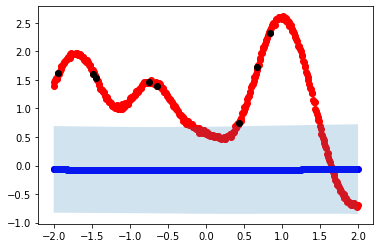

  2%|▏         | 4996/200000 [01:05<53:47, 60.42it/s]  

Mean loss at epoch 5000 : 0.7553516626358032
True
 Validation loss after 5000 equals 0.899222731590271


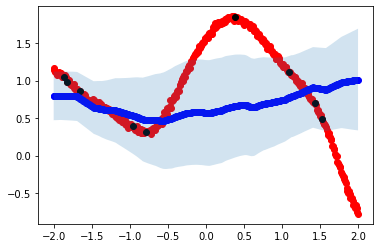

  5%|▍         | 9997/200000 [02:10<40:15, 78.65it/s]  

Mean loss at epoch 10000 : 0.6158651113510132
True
 Validation loss after 10000 equals 0.5478429794311523


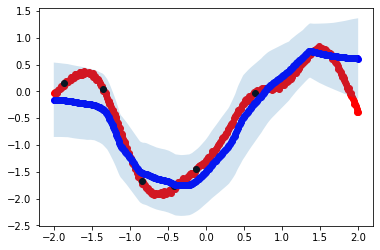

  7%|▋         | 14993/200000 [03:14<40:55, 75.34it/s]  

Mean loss at epoch 15000 : 0.8922644257545471
True
 Validation loss after 15000 equals 1.1908917427062988


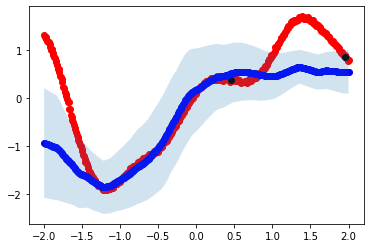

 10%|▉         | 19999/200000 [04:21<37:30, 79.99it/s]  

Mean loss at epoch 20000 : 0.9397816061973572
True
 Validation loss after 20000 equals 0.5371164083480835


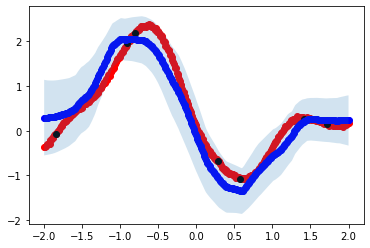

 12%|█▏        | 24997/200000 [05:25<38:11, 76.38it/s]

Mean loss at epoch 25000 : 1.0095534324645996
True
 Validation loss after 25000 equals 0.7836238741874695


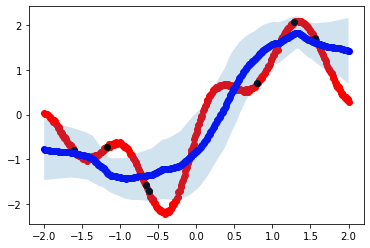

 15%|█▍        | 29992/200000 [06:30<35:05, 80.73it/s]  

Mean loss at epoch 30000 : 0.32131531834602356
True
 Validation loss after 30000 equals 1.536352276802063


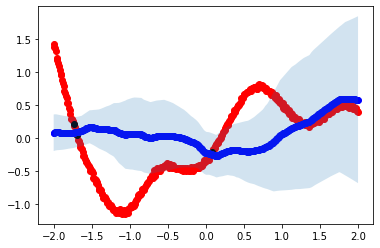

 17%|█▋        | 34993/200000 [07:36<34:15, 80.26it/s]

Mean loss at epoch 35000 : 0.5593723654747009
True
 Validation loss after 35000 equals 0.8738978505134583


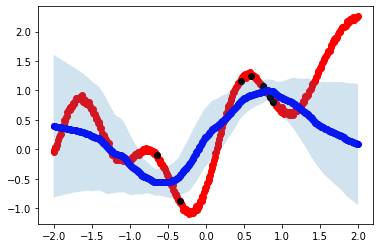

 20%|██        | 40000/200000 [08:40<33:33, 79.46it/s]

Mean loss at epoch 40000 : 0.4087235629558563
True
 Validation loss after 40000 equals 0.9485569000244141


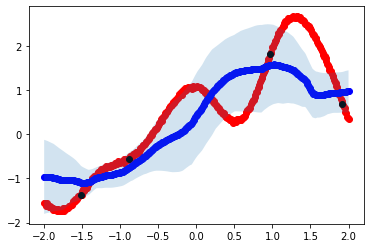

 22%|██▏       | 44994/200000 [09:44<32:34, 79.30it/s]

Mean loss at epoch 45000 : 0.8341754078865051
True
 Validation loss after 45000 equals 0.771944522857666


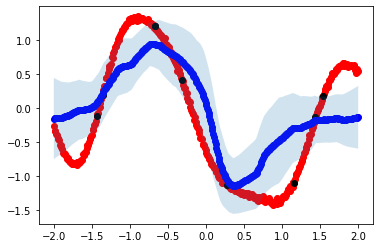

 25%|██▍       | 49998/200000 [10:49<31:21, 79.72it/s]  

Mean loss at epoch 50000 : 0.6198187470436096
True
 Validation loss after 50000 equals 0.29387885332107544


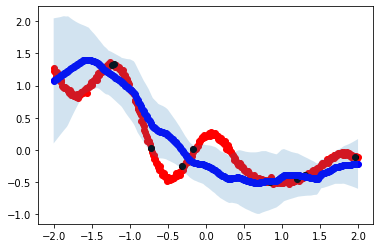

 27%|██▋       | 54155/200000 [11:44<31:36, 76.89it/s]  


KeyboardInterrupt: 

In [7]:
model_weights = trainer.run_training(**default_conf[CONFIGURATION]['data_gen_params'], valiloader=None, plotting=True)